# K-Means utilizando el dataset Iris

In [1]:
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd 
import matplotlib.pyplot as plt

### Cargando el data set Iris

In [2]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

### Creando las variables

In [3]:
X_iris = iris.data
Y_iris = iris.target

In [5]:
# Creamos un data Frame
x = pd.DataFrame(iris.data, columns = iris.feature_names)
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y = pd.DataFrame(iris.target, columns = ['Target'])
y

,Target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


### Graficando los datos

Text(0, 0.5, 'Petal Width')

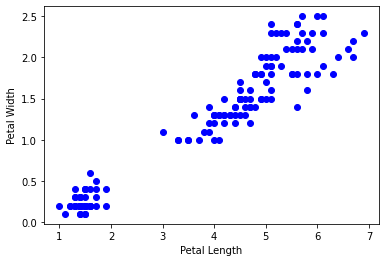

In [10]:
plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c = 'blue')
plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize = 10)

Text(0, 0.5, 'Sepal Width')

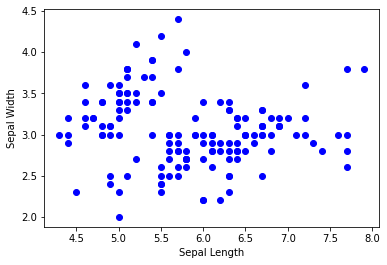

In [11]:
plt.scatter(x['sepal length (cm)'], x['sepal width (cm)'], c = 'blue')
plt.xlabel('Sepal Length', fontsize = 10)
plt.ylabel('Sepal Width', fontsize = 10)

### Estimación de un buen K usando el método del codo

Text(0, 0.5, 'WCSS')

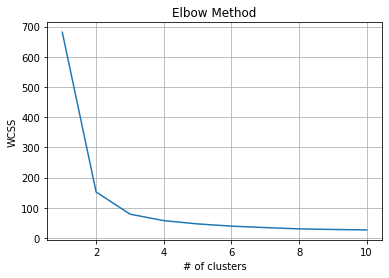

In [12]:
wcss = [] # (within-cluster sums of squares)


for i in range (1, 11): # Número de K's a evaluar
    kmeans = KMeans(n_clusters = i # Llamamos a evaluar al KMeans en el rango elegido
                    , max_iter = 1000 
                    , random_state = 0) 
    kmeans.fit(x) 
    # .intertia_ --> Suma de distancias cuadradas de muestras a su centro de conglomerado más cercano.
    # las agregamos a la lista wcss
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss) #Dibuja X entre 1 y 10. En Y los valores de las sumas
plt.title('Elbow Method')
plt.grid()
plt.xlabel('# of clusters')
plt.ylabel('WCSS')

### Creando el modelo

In [14]:
from sklearn import metrics
model = KMeans(n_clusters=3, max_iter = 1000) # k = 3
model.fit(x) # Entrenamos con los valores
y_labels = model.labels_ # Obtenemos las etiquetas basado en los datos que encontró
y_kmeans = model.predict(x)
accuracy = metrics.adjusted_rand_score(Y_iris, y_kmeans) # Le pasamos la info previa y la predicha
print(accuracy)

0.7302382722834697


### Graficando clasificación

Text(0, 0.5, 'Petal Width')

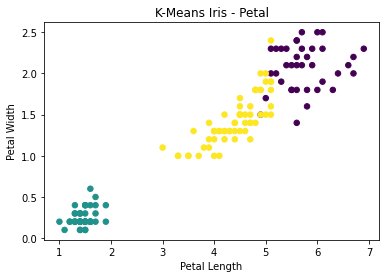

In [16]:
# Aquí hacemos c = y_kmeans para diferenciar los puntos en diferentes colores de acuerdo a su cluster
plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c = y_kmeans, s= 30)
plt.title('K-Means Iris - Petal')
plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize = 10)

Text(0, 0.5, 'Sepal Width')

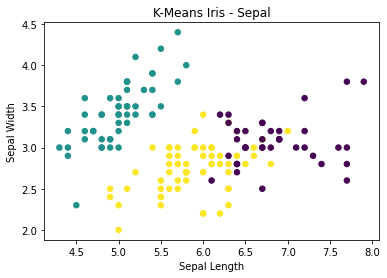

In [17]:
# Aquí hacemos c = y_kmeans para diferenciar los puntos en diferentes colores de acuerdo a su cluster
plt.scatter(x['sepal length (cm)'], x['sepal width (cm)'], c = y_kmeans, s= 30)
plt.title('K-Means Iris - Sepal')
plt.xlabel('Sepal Length', fontsize = 10)
plt.ylabel('Sepal Width', fontsize = 10)

---